Reference: http://www.oranlooney.com/post/ml-from-scratch-part-1-linear-regression/

In [1]:
import regression

import matplotlib
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from numpy.linalg import det
from scipy.stats import ortho_group
from numpy.testing import assert_allclose

%matplotlib inline

In [2]:
boston = load_boston()
X_raw = boston.data
y_raw = boston.target

In [3]:
shuffle = np.random.permutation(len(y_raw))
X_full = X_raw[shuffle,].copy()
y_full = y_raw[shuffle].copy()

In [4]:
train_test_split = int(0.8 * len(y_full))
X_train = X_full[:train_test_split, :]
y_train = y_full[:train_test_split]
X_test = X_full[train_test_split:, :]
y_test = y_full[train_test_split:]

In [5]:
model = regression.LinearRegression()
model.fit(X_train, y_train)

In [8]:
def goodness_of_fit_report(label, model, X, y):
    y_hat = model.predict(X)
    
    plt.scatter(x=y, y=y_hat, label=label, alpha=0.5)
    plt.title("Predicted vs. Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predictions")
    plt.legend()
    
    mse = np.mean( (y - y_hat) ** 2 )
    y_bar = np.mean(y)
    r2 = 1 - np.sum( (y - y_hat) ** 2 ) / np.sum( (y - y_bar) ** 2 )
    print(f"{label: <16} MSE: {mse: .2f}, R2: {r2: .2f}")

Training Set     MSE:  22.42, R2:  0.74
Test Set         MSE:  20.92, R2:  0.72


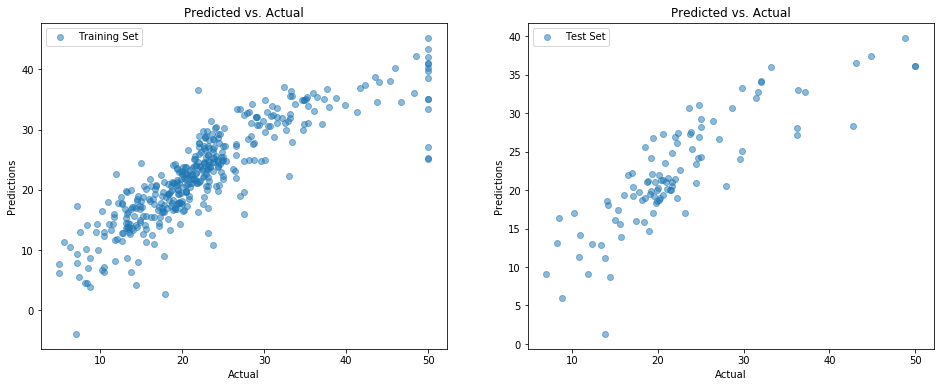

In [13]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
goodness_of_fit_report("Training Set", model, X_train, y_train)
plt.subplot(1, 2, 2)
goodness_of_fit_report("Test Set", model, X_test, y_test)


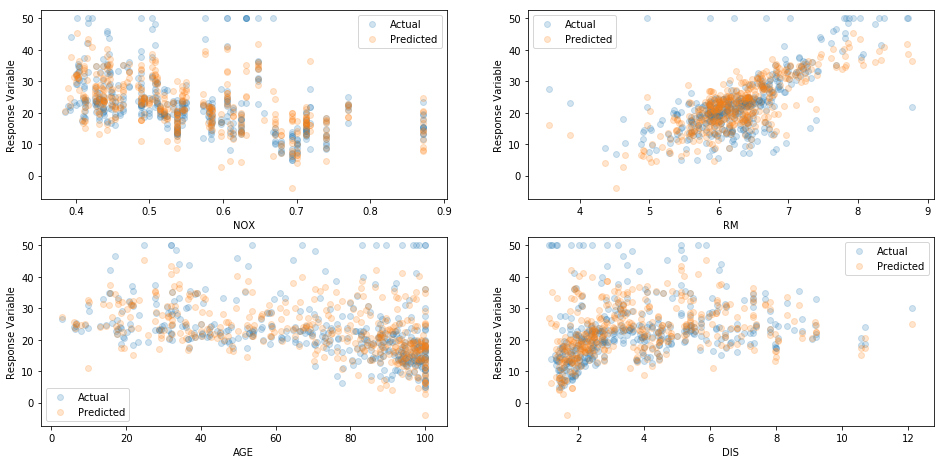

In [22]:
y_hat = model.predict(X_train)
plt.figure(figsize=(16, 16))
for i in range(4, 8):
    plt.subplot(4, 2, i + 1)
    plt.scatter(x=X_train[:, i], y=y_train, alpha=0.2, label="Actual")
    plt.scatter(x=X_train[:, i], y=y_hat, alpha=0.2, label="Predicted")
    plt.legend()
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("Response Variable")